# K-Nearest Neighbors (KNN)

### KNN is a non-parametric model used for both regression and classification
- Non-parametric means that the model has no parameters, unlike a linear regression model or neural network
    - Predictions of future data are based entirely on training examples
- Downside is that you need to hold all training data in memory while making future predicts with the model

### How does it work? (Classification)
- Given a new test data point $P$ where you don't know what class it belongs to, it predicts the class of the new data point by
    - Finding the nearest K training data points to $P$
    - Giving each K training data points a "vote" to what class $P$ belongs to.
- Example (K=5)
    - If 3 of the nearest training data points to $P$ belong to class 0, and 2 belong to class 1, the KNN model will predict that $P$ belongs to class 0
    
### How does it work? (Regression)
- Given a new test data point $P$ where you don't know what output value it should have, it predicts the output value of the new data point by
    - Finding the nearest K training data points to $P$
    - Averaging the output values of the K training data points
    - Predicting that $P$ will have an output value of this average
- Example (K=5)
    - If the 5 nearest data points have an output value of [2,2,3,4,4] the KNN model will predict that $P$ has an output value of 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

np.random.seed(999)

print('NumPy version', np.__version__)
print('pandas version', pd.__version__)

NumPy version 1.15.0
pandas version 1.0.1


### Generate data for two seperate class
- Each class will have two features
- Class 0 will have features generated from a random normal distribution with mean 0.25 and standard deviation 0.2
- Class 1 will have features generated from a random normal distribution with mean 0.75 and standard deviation 0.2

In [2]:
num_examples = 10
num_features = 2
# Generate data for the two classes
X = np.concatenate(
    [
     np.random.normal(0.25,0.2, size=(num_examples,num_features)), 
     np.random.normal(0.75,0.2, size=(num_examples,num_features))
    ], 
    axis=0)
y = np.concatenate([[0]*num_examples, [1]*num_examples], axis=0)

color_map = {
    0:'blue',
    1:'red'
}
color = [color_map[y_val] for y_val in y]

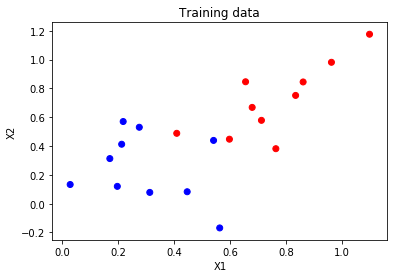

In [3]:
plt.scatter(X[:,0], X[:,1], color=color)
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Train KNN model with K=5

In [4]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Classifying a new data point

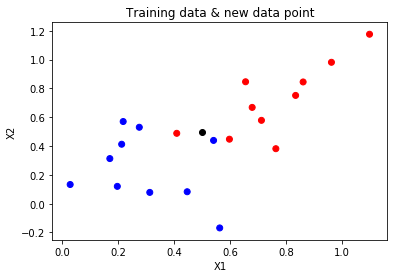

In [5]:
# X1 = 0.5, X2 = 0.5
X_test = [0.5,0.5]
plt.scatter(X[:,0], X[:,1], color=color)
plt.scatter(X_test[0], X_test[1], color='black')
plt.title('Training data & new data point')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### What is our predicted class for this new data point?

In [6]:
print('Predicted Class:\n', knn_model.predict([X_test]))

Predicted Class:
 [1]


### What were the estimated probabilities of belonging to each class?
- This means the 2 of the nearest neighbors belong to class 0, and 3 belong to class 1
- We know this because we used equal weighting for each nearest neighbor (not weighted depending on distance, as more complex KNN models utilize)

In [7]:
print('Predicted probability distributions over all classes:\n', knn_model.predict_proba([X_test]))

Predicted probability distributions over all classes:
 [[0.4 0.6]]


### Classifying multiple new data points at once

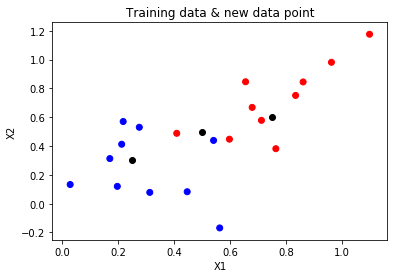

In [8]:
X_test = np.asarray([[0.5,0.5],[0.75,0.6],[0.25,0.3]])   
plt.scatter(X[:,0], X[:,1], color=color)
plt.scatter(X_test[:,0], X_test[:,1], color='black')
plt.title('Training data & new data point')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
print('Predicted classes:\n', knn_model.predict(X_test))
print('\nPredicted probability distributions over all classes:\n', knn_model.predict_proba(X_test))

Predicted classes:
 [1 1 0]

Predicted probability distributions over all classes:
 [[0.4 0.6]
 [0.  1. ]
 [1.  0. ]]
